In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

<div>

## Utils

<div>

### Carga de datos

In [2]:
import pandas as pd

# #si el archivo es .tsv, remplazar , por ' ' y ahcer lo siguiente
# df1 = pd.read_csv('dataset.csv', sep='\t')
# df1 = df1.drop(columns=['Muestra']) #elimino la columna de muestra
# largo1 = df1['Largo']
# ancho1 = df1['Ancho']

# #si el archivo es un .csv
# df2 = pd.read_csv('Clase1.csv', decimal=',') #si el archivo tiene decimales con , en vez de .
# largo1 = df2['Largo']
# ancho1 = df2['Ancho']

# df3 = pd.read_csv('Clase2.tsv', sep='\t')
# largo2 = df3['Largo']
# ancho2 = df3['Ancho']

df = pd.read_csv('dataset.csv')

##separo los datos en dos clases

df1 = df[df['clase'] == 1]
df2 = df[df['clase'] == 2]

largo1 = df1['largo']
ancho1 = df1['ancho']

largo2 = df2['largo']
ancho2 = df2['ancho']


### Solo para los proximos tests

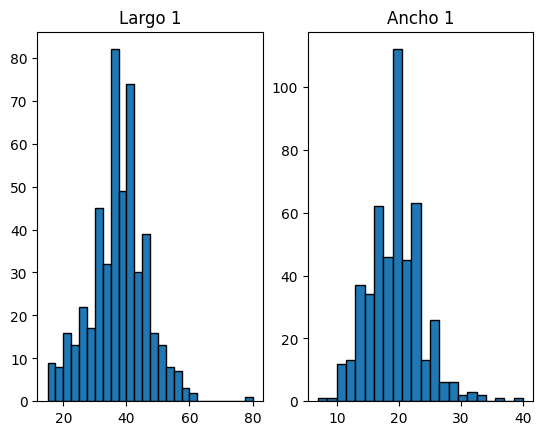

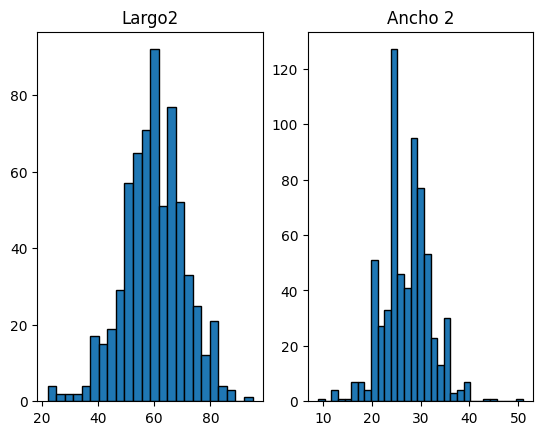

Distribucion de probabilidad conjunta


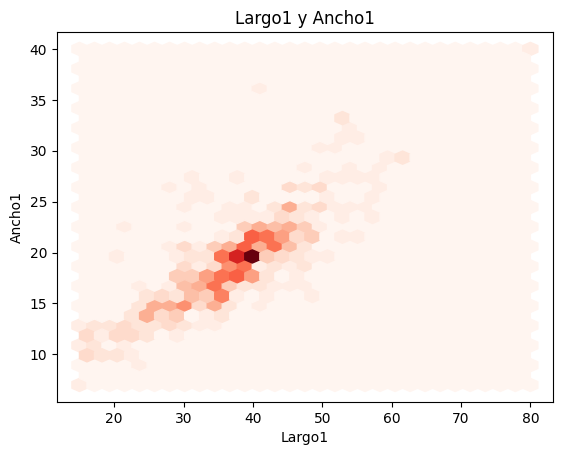

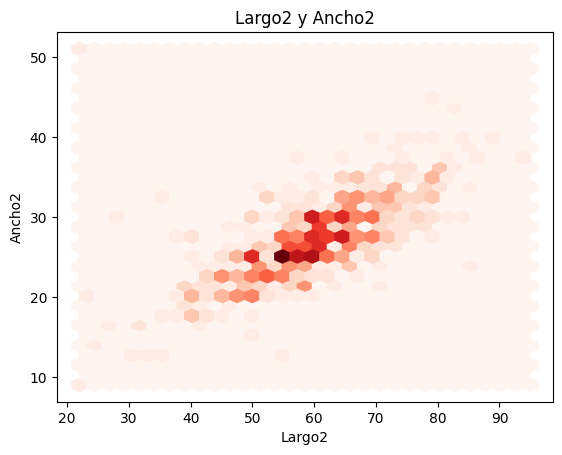

Mas simple


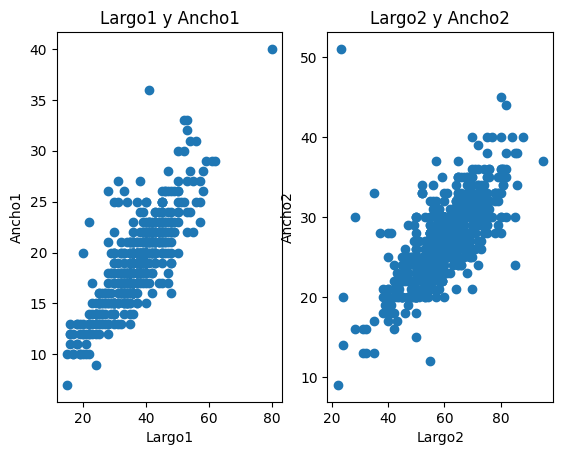

In [3]:
#graficamos los datos
fig, ax = plt.subplots(1,2)

datos_en_los_bins_largo1, bins_hist_largo1,_=ax[0].hist(largo1, bins='auto', edgecolor='black')
ax[0].set_title('Largo 1')
datos_en_los_bins_ancho1, bins_hist_ancho1, _ = ax[1].hist(ancho1, bins='auto', edgecolor='black')
ax[1].set_title('Ancho 1')
plt.show()

fig, ax = plt.subplots(1,2)

datos_en_los_bins_largo2,bins_hist_largo2,_=ax[0].hist(largo2, bins='auto', edgecolor='black')
ax[0].set_title('Largo2')
datos_en_los_bins_ancho2, bins_hist_ancho2, _ = ax[1].hist(ancho2, bins='auto', edgecolor='black')
ax[1].set_title('Ancho 2')
plt.show()


print("Distribucion de probabilidad conjunta")

plt.hexbin(largo1, ancho1, gridsize=30, cmap='Reds')
plt.title('Largo1 y Ancho1')
plt.xlabel('Largo1')
plt.ylabel('Ancho1')
plt.show()

plt.hexbin(largo2, ancho2, gridsize=30, cmap='Reds')
plt.title('Largo2 y Ancho2')
plt.xlabel('Largo2')
plt.ylabel('Ancho2')
plt.show()

print("Mas simple")

fig, ax = plt.subplots(1,2)
ax[0].scatter(largo1, ancho1)
ax[0].set_title('Largo1 y Ancho1')
ax[0].set_xlabel('Largo1')
ax[0].set_ylabel('Ancho1')
ax[1].scatter(largo2, ancho2)
ax[1].set_title('Largo2 y Ancho2')
ax[1].set_xlabel('Largo2')
ax[1].set_ylabel('Ancho2')
plt.show()

### Cosas normales

In [4]:
def n_mu_sigma(x, mu, sigma): #sigma desviacion estandar, fdp de la normal
    return 1/(sigma*np.sqrt(2*np.pi)) * np.exp(-((x-mu)**2)/(2*sigma**2))

</div>

#### Exponencial

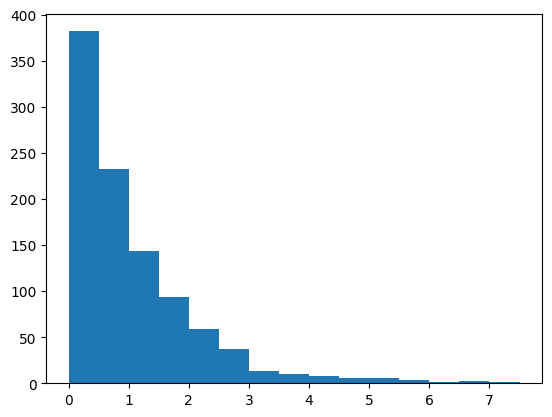

In [5]:

def generate_exponential(n=1000, lambd=1, u=None):
    #generar exponenciales a partir de una uniforme
    # x= -ln(1-u)/lambda
    u= np.random.uniform(0,1,n) if u is None else u
    return -np.log(1-u)/lambd

e=generate_exponential(1000,1)
Bins=np.arange(min(e),max(e)+0.5,0.5)
plt.hist(e, bins=Bins, )
plt.show()


</div>

#### Normal. Box Muller

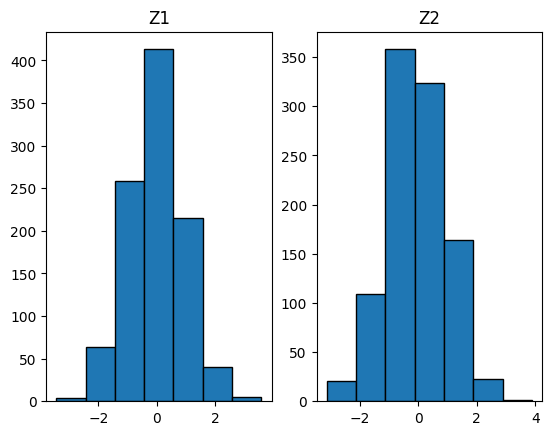

[  4.  64. 259. 413. 215.  40.   5.]
[-3.43452672 -2.43452672 -1.43452672 -0.43452672  0.56547328  1.56547328
  2.56547328  3.56547328]


In [6]:
def generate_normal(n=1000, u1=None, u2=None):
    #generar normales a partir de las uniformes
    # z1=Rcos(theta)= np.sqrt(-2*np.log(u1)) * np.cos(2*np.pi*u2)
    # z2=Rsin(theta)= np.sqrt(-2*np.log(u1)) * np.sin(2*np.pi*u2)
    u1= np.random.uniform(0,1,n) if u1 is None else u1
    u2= np.random.uniform(0,1,n) if u2 is None else u2

    R= np.sqrt(-2*np.log(u1))
    theta= 2*np.pi*u2

    z1= R*np.cos(theta)
    z2= R*np.sin(theta)
    return z1, z2


z1,z2=generate_normal(1000)
bins1=np.arange(min(z1),max(z1)+1,1)
bins2=np.arange(min(z2),max(z2)+1,1)
fig, ax = plt.subplots(1,2)
datos_en_los_bins_datos1, bins_hist_datos1,_=ax[0].hist(z1, bins=bins1, edgecolor='black')
ax[0].set_title('Z1')
datos_en_los_bins_datos2, bins_hist_datos2, _ = ax[1].hist(z2, bins=bins2, edgecolor='black')
ax[1].set_title('Z2')
plt.show()
print(datos_en_los_bins_datos1)
print(bins_hist_datos1)

</div>

## Tests

</div>

### Test de independencia con $X^2$




In [7]:
from scipy.stats import chi2

def test_independence(H, h_X, h_Y, N_bins, M_bins, L, alpha=0.05):
    counter = 0
    for i in range(N_bins):
        for j in range(M_bins):
            if h_X[i] * h_Y[j] != 0:
                counter += ((H[i, j] - (h_X[i] * h_Y[j]) / L) ** 2) / ((h_X[i] * h_Y[j]) / L)

    chi2_threshold = chi2.ppf(alpha, (N_bins-1)*(M_bins-1))
    if counter > chi2_threshold:
        result = "Rechazamos H0: Hay evidencia para decir que X e Y no son independientes."
    else:
        result = "No rechazamos H0: No hay evidencia suficiente para decir que X e Y no son independientes."

    degrees_of_freedom = (N_bins-1)*(M_bins-1)
    return result, degrees_of_freedom, chi2_threshold

H, a, b = np.histogram2d(largo1, ancho1, bins=[bins_hist_largo1, bins_hist_ancho1])
h_X, _ = np.histogram(largo1, bins=bins_hist_largo1)
h_Y, _ = np.histogram(ancho1, bins=bins_hist_ancho1)

N_bins = len(bins_hist_largo1) - 1
M_bins = len(bins_hist_ancho1) - 1

L = min(len(largo1), len(ancho1))

result, degrees_of_freedom, chi2_threshold = test_independence(H, h_X, h_Y, N_bins, M_bins, L)

print(result)



Rechazamos H0: Hay evidencia para decir que X e Y no son independientes.


</div>

### Test normalidad de kolgmorov-smirnof

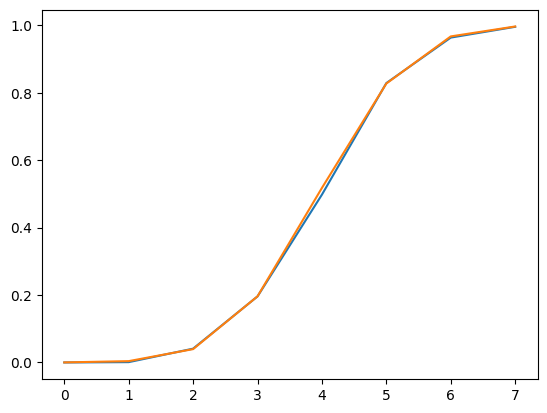

bins: 7.0
maxima diferencia es: 0.01994525403688807
probabilidad de equivocarme al rechazar como normal 97.75456369121146 %


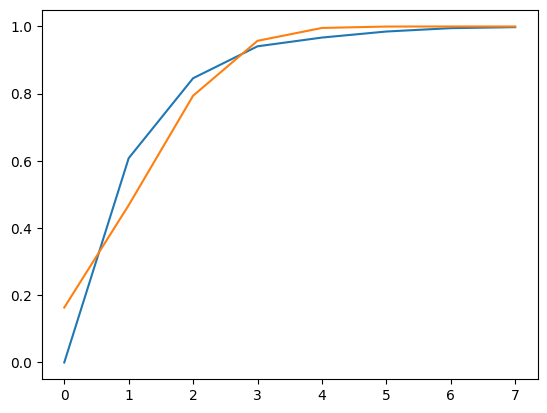

bins: 7.0
maxima diferencia es: 0.16354081333979187
probabilidad de equivocarme al rechazar como normal 62.04269764180105 %


In [8]:

def ks_normal(sample):
    '''
    Test para verificar si una muestra es normal
    H0: la muestra es normal
    '''
    sample = np.array(sorted(sample))
    sample =  (sample - sample.mean())/(sample.std())
    max_diff = 0
    curr = 0
    bin_size = 0.9 #cuanto mas chico el bin size mas bins entonces mas chica la probabilidad de equivocarme
    A, B = [], []
    for lim in np.arange(sample.min(), sample.max(), bin_size):
        while curr < len(sample) and sample[curr] < lim:
            curr += 1
        F_lim = curr / len(sample)
        max_diff = max(max_diff, abs(F_lim - stats.norm.cdf(lim)))
        A.append(F_lim)
        B.append(stats.norm.cdf(lim))

    plt.plot(A)
    plt.plot(B)
    plt.show()

    bins = (sample.max() - sample.min())//bin_size
    print("bins:", bins)
    print("maxima diferencia es:", max_diff)
    print("probabilidad de equivocarme al rechazar como normal",(1 - stats.ksone(bins).cdf(max_diff))*100,"%")

ks_normal(z1)
ks_normal(e)

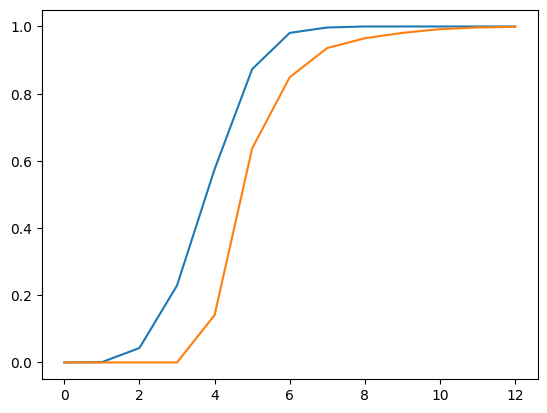

bins: 12.0
maxima diferencia es: 0.43399999999999994
probabilidad de equivocarme al rechazar como iguales 0.7138886979543568 %


In [9]:
def ks_two_samples(s1, s2):
    '''
    Test para verificar si dos muestras son iguales (tienen la misma distribucion)
    H0: las muestras son iguales
    '''
    s1 = np.array(sorted(s1))
    s2 = np.array(sorted(s2))
    max_diff = 0
    curr1, curr2 = 0, 0
    bin_size = 0.9
    A, B = [], []
    for lim in np.arange(min(s1.min(), s2.min()), max(s1.max(), s2.max()), bin_size):
        while curr1 < len(s1) and s1[curr1] < lim:
            curr1 += 1
        while curr2 < len(s2) and s2[curr2] < lim:
            curr2 += 1
        F1_lim, F2_lim = curr1 / len(s1), curr2 / len(s2)
        max_diff = max(max_diff, abs(F1_lim - F2_lim))
        A.append(F1_lim)
        B.append(F2_lim)

    plt.plot(A)
    plt.plot(B)
    plt.show()

    bins = (max(s1.max(), s2.max()) - min(s1.min(), s2.min()))//bin_size
    print("bins:", bins)
    print("maxima diferencia es:", max_diff)
    print("probabilidad de equivocarme al rechazar como iguales",(1 - stats.ksone(bins).cdf(max_diff))*100,"%")

ks_two_samples(z1, e)

</div>

### Test de Correlacion de Pearson

Elementos mayores a la correlacion en las listas shuffleadas: 100


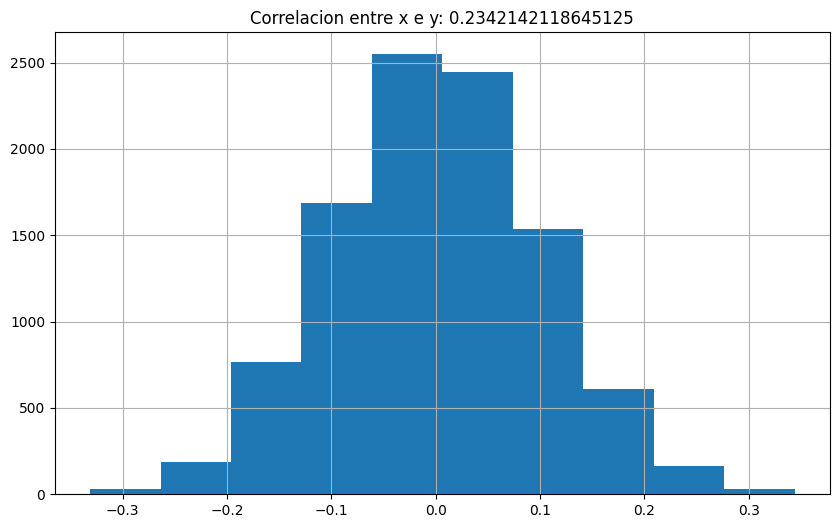

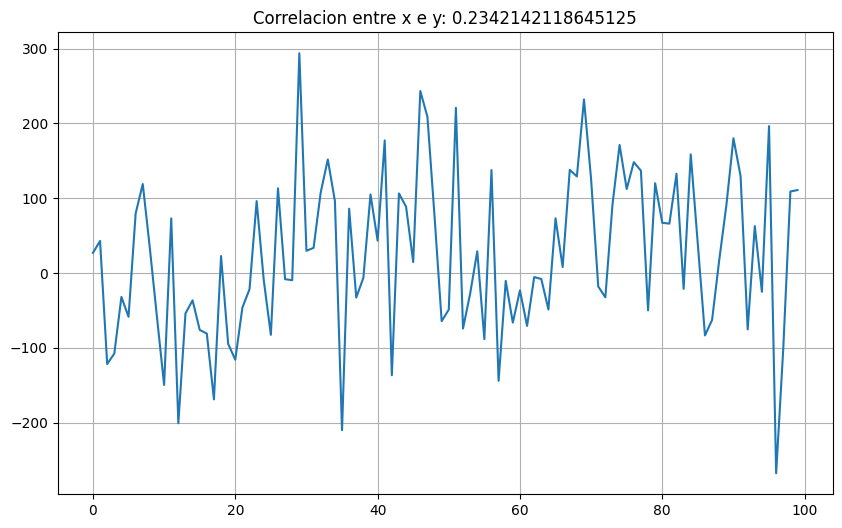

podemos rechazar que x e y no estan correlacionados con un 0.01 de confianza de equivocarnos


In [10]:
def correlacion_1_variable(x, y_val, n_randoms):
    H0= "x e y no estan correlacionados"
    x_val_inicial = x
    y_val_inicial = y_val

    correlacion_inicial = np.corrcoef(x, y_val)[0][1]

    correlac_list = []
    mayores = 0

    #Basicamente tengo dos listas de variables y quiero ver si estan correlacionadas. Para esto calculo el coeficiente de correlacion.
    #Pero, quiero saber que tan seguro puedo estar de que esta aproximacion es precisa, entonces shuffleo las listas y le calculo el coeficiente a cada una.
    #Esto lo que deberia hacer es que si estan correlacionadas la correlacion inicial es mayor que las correlaciones de este shuffleo,
    #Ya que variables random entre si no deberian tener relacion.

    for i in range(n_randoms):
        y_val = np.random.permutation(y_val)
        x = np.random.permutation(x)
        correlacion = np.corrcoef(x, y_val)[0][1]
        correlac_list.append(correlacion)
        if correlacion >= correlacion_inicial: #Me fijo si la correlacion es mayor a la inicial. Mientras mas ruido mas van a haber.
            mayores += 1

    print(f"Elementos mayores a la correlacion en las listas shuffleadas: {mayores}")

    if mayores == 0: #ajusto por tema de cuentas
        mayores = 1

    #Grafico el histograma de las correlaciones luego de shufflear la lista. Si las variables estan correlacionadas la inicial deberia aparecer pocas veces o casi nada.
    #Ya que al shufflear las correlaciones deberian ser mas bajas que la inicial (si estan correlacionadas).
    plt.figure(figsize=(10, 6))
    plt.hist(correlac_list)
    plt.title(f"Correlacion entre x e y: {correlacion_inicial}")
    plt.grid(True)
    plt.show()

    # Calculo las variables inicialmente a ver si hay alguna correlacion visual
    plt.figure(figsize=(10, 6))
    plt.plot(x_val_inicial, y_val_inicial)
    plt.title(f"Correlacion entre x e y: {correlacion_inicial}")
    plt.grid(True)
    plt.show()

    print(f"podemos rechazar que {H0} con un {mayores/n_randoms} de confianza de equivocarnos")

def y(x):
    return 1/2 * x + np.random.normal(0,1) * 100 #La normal es el ruido, mientras mas la multipliquemops mas ruido hay
x = np.arange(0, 100, 1)

y_val = []

for i in x:
    y_val.append(y(i))

correlacion_1_variable(x, y_val, 10000)

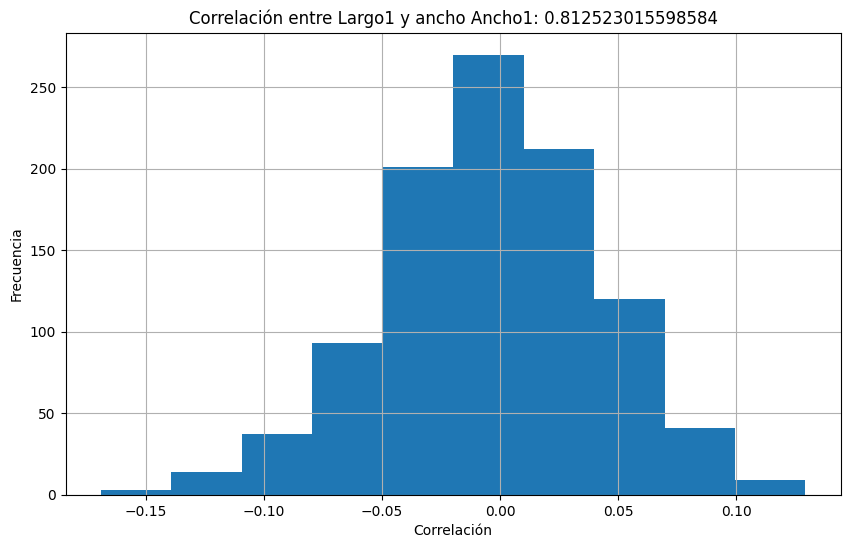

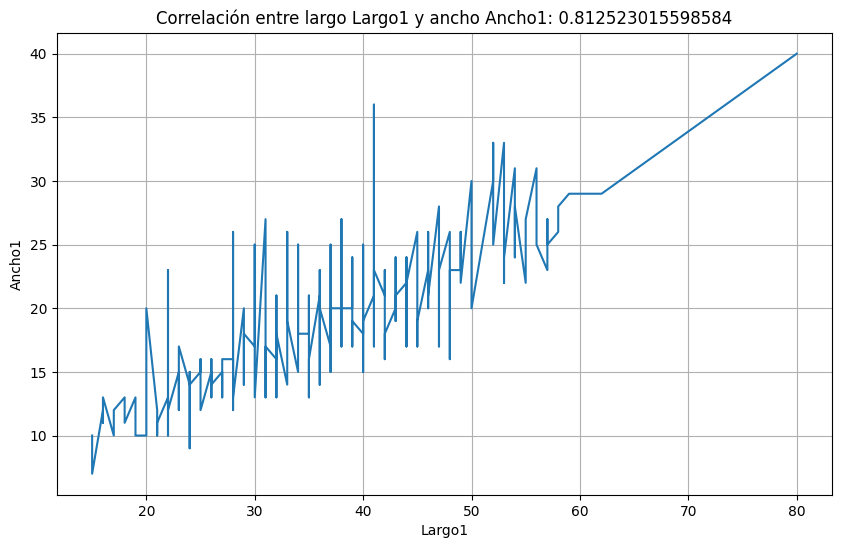

podemos rechazar que no estan correlacionados con un 0.001  de confianza de equivocarnos


In [11]:
def correlacion(data1, data2, nombre_data1, nombre_data2): #nombre de data solo para printear
    H0="no estan correlacionados"
    correlacion_inicial = np.corrcoef(data1, data2)[0][1]

    # Lista para almacenar las correlaciones permutadas
    correlac_list = []
    datos_combinados = list(zip(data1, data2))

    # Ordena la lista combinada en función del valor del largo
    datos_ordenados = sorted(datos_combinados, key=lambda x: x[0])

    # Separa los datos ordenados en listas separadas para largo y ancho
    data1_ordenada, data2_ordenada = zip(*datos_ordenados)

    correlaciones_mayores_a_la_inicial = 0
    N=1000
    for i in range(N):
        data2_permutada = np.random.permutation(data2) #permuto uno de los datos
        correlacion = np.corrcoef(data1, data2_permutada)[0][1]
        if correlacion > correlacion_inicial:
            correlaciones_mayores_a_la_inicial += 1 #guardo los mayores a la correlacion verdadera
        correlac_list.append(correlacion)

    if correlaciones_mayores_a_la_inicial == 0: #ajusto por tema de cuentas
        correlaciones_mayores_a_la_inicial = 1

    # Histograma de las correlaciones permutadas
    plt.figure(figsize=(10, 6))
    plt.hist(correlac_list)
    plt.title(f"Correlación entre {nombre_data1} y ancho {nombre_data2}: {correlacion_inicial}")
    plt.xlabel('Correlación')
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.show()

    # Gráfico de dispersión para lista de datos
    plt.figure(figsize=(10, 6))
    plt.plot(data1_ordenada, data2_ordenada)
    plt.title(f"Correlación entre largo {nombre_data1} y ancho {nombre_data2}: {correlacion_inicial}")
    plt.xlabel(f'{nombre_data1}')
    plt.ylabel(f'{nombre_data2}')
    plt.grid(True)
    plt.show()

    # que tan seguro estamos de que estan correlacionadas
    print(f"podemos rechazar que {H0} con un {correlaciones_mayores_a_la_inicial/N}  de confianza de equivocarnos")

# correlacion(z1, z2, "Z1", "Z2")
# correlacion(z1, e, "Z1", "Exponencial")

correlacion(largo1, ancho1, "Largo1", "Ancho1")
# correlacion(largo2, ancho2, "Largo2", "Ancho2")

</div>

### Test de Homocedasticidad.

In [12]:
def f_test(group1, group2):
    #hipotesis nula: son iguales sus varianzas
    H0="son iguales sus varianzas"
    # alpha=0.05
    f = (np.std(group1)/np.std(group2))**2
    n1 = len(group1)-1
    n2 = len(group2)-1
    p_value = 1-stats.f.cdf(f, n1, n2)
    print(f'f: {f}, p_value: {p_value}')
    print(f"Podemos rechazar que {H0} con una probabilidad de {p_value} de equivocarnos")
    # return f, p_value

# f_test(z1[:int(len(z1)/2)], z1[int(len(z1)/2):]) #mitad de un  mismo grupo
# f_test(ancho1[int(len(largo1)/2):], ancho1[:int(len(largo1)/2)]) #mitad de un  mismo grupo
f_test(ancho2[:int(len(largo1)/2)], ancho2[int(len(largo1)/2):]) #mitad de un  mismo grupo

# si este test da que se puede rechazar, cuando no deberia pasar y
# si se invierten las mitades del grupo no se puede rechazar, hay que permutar la muestra


f: 0.8100304007845772, p_value: 0.9649541807895425
Podemos rechazar que son iguales sus varianzas con una probabilidad de 0.9649541807895425 de equivocarnos


<div>

### Test de T-Student

<div>

#### Test de una muestra (One-Sample t-Test).

In [13]:
# Z-test para evaluar con N >30
def ztest_one(data, popmean=0):
    # z-test (normal) de una muestra
    z = (np.mean(data)-popmean)/(np.std(data)/np.sqrt(len(data)))
    if z<0:
        pvalue = 2*stats.norm.cdf(z)
    else:
        pvalue = 2*(1-stats.norm.cdf(z))
    return z, pvalue

In [14]:
# para N < 30
u = np.random.uniform(0,1,1000)
t_data=np.log(u) #t data es data transformada
t_mu=0
print('t-test con muestras transformadas (normales).')
st = stats.ttest_1samp(a=t_data, popmean=t_mu)
print(f'Estadistico: {st.statistic} \t pvalue: {st.pvalue}')

t-test con muestras transformadas (normales).
Estadistico: -32.94437449776238 	 pvalue: 1.0054691937589315e-161


<div>

#### Test de dos muestras (Two-Sample t-Test).

In [15]:
def ztest_two(data1, data2):
    # z-test de dos muestras,
    # para varianzas desconocidas, pero cercanas.
    #H0: las dos muestras poseen la misma media muestral
    H0="las dos muestras poseen la misma media muestral"
    n1 = len(data1)
    n2 = len(data2)

    sp = np.sqrt( ((n1-1)*np.var(data1) + (n2-1)*np.var(data2)) / (n1+n2-2))
    nn = np.sqrt(1/len(data1)+1/len(data2))
    # z-test (normal) de una muestra
    z = (np.mean(data1)-np.mean(data2))/(sp*nn)
    if z<0:
        p_value = 2*stats.norm.cdf(z)
    else:
        p_value = 2*(1-stats.norm.cdf(z))
    print(f'Estadistico: {z} \t p_value: {p_value}')
    print(f"Se puede rechazar la hipotesis de que {H0} con una probabilidad de {p_value} de equivocarnos")
    return z, p_value

print('Z-test de z1 y z2.')
z, p_value = ztest_two(z1, z2)

Z-test de z1 y z2.
Estadistico: 0.6520709891095154 	 p_value: 0.514355378081679
Se puede rechazar la hipotesis de que las dos muestras poseen la misma media muestral con una probabilidad de 0.514355378081679 de equivocarnos


## Sampling

### Primer acercamiento es tirar dos uniformes.

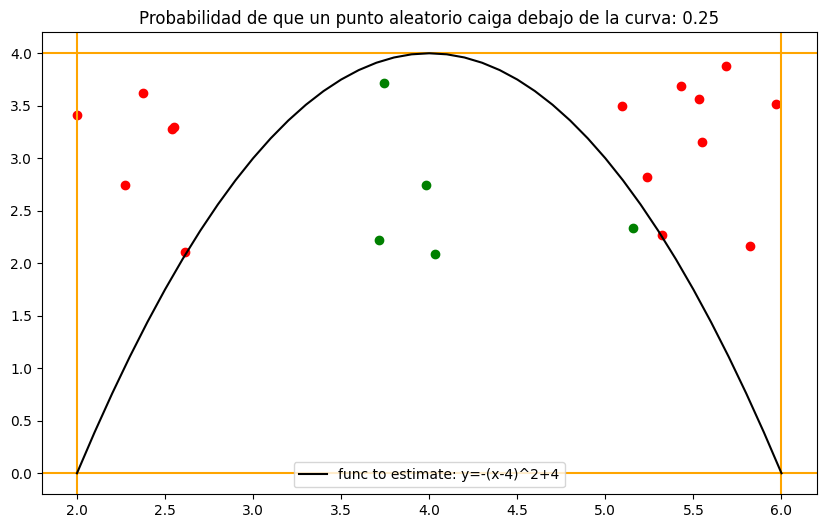

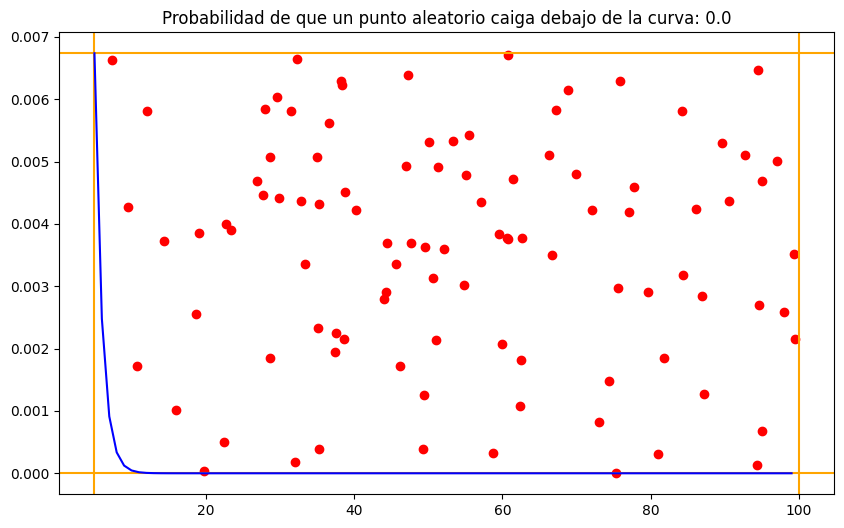

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

x= np.arange(2, 6.1, 0.1)

n=20
uniforme1=np.random.uniform(2, 6, n)
uniforme2=np.random.uniform(2, 4, n)

def func_to_estimate(x):
    return -(x-4)**2+4

puntos_dentro_de_la_funcion=[]
puntos_arriba_de_la_funcion=[]
for i in range(n):
    if uniforme2[i]<=func_to_estimate(uniforme1[i]):
        puntos_dentro_de_la_funcion.append([uniforme1[i], uniforme2[i]])
    else:
        puntos_arriba_de_la_funcion.append([uniforme1[i], uniforme2[i]])

probabilidad=len(puntos_dentro_de_la_funcion)/n

plt.figure(figsize=(10, 6))

plt.title(f"Probabilidad de que un punto aleatorio caiga debajo de la curva: {probabilidad}")
plt.axvline(x=2, color='orange')
plt.axvline(x=6, color='orange')
plt.axhline(y=func_to_estimate(2), color='orange')
plt.axhline(y=func_to_estimate(4), color='orange')
plt.scatter(*zip(*puntos_dentro_de_la_funcion), color='green')
plt.scatter(*zip(*puntos_arriba_de_la_funcion), color='red')
plt.plot(x, func_to_estimate(x), color='black', label='func to estimate: y=-(x-4)^2+4')
plt.legend()

plt.show()


x= np.arange(5, 100, 1)

def func_to_estimate(x):
    return np.e**-x

n=100
uniforme1=np.random.uniform(5, 100, n)
uniforme2=np.random.uniform(0, func_to_estimate(5), n)

puntos_dentro_de_la_funcion=[]
puntos_arriba_de_la_funcion=[]
for i in range(n):
    if uniforme2[i]<=func_to_estimate(uniforme1[i]):
        puntos_dentro_de_la_funcion.append([uniforme1[i], uniforme2[i]])
    else:
        puntos_arriba_de_la_funcion.append([uniforme1[i], uniforme2[i]])

probabilidad=len(puntos_dentro_de_la_funcion)/n

plt.figure(figsize=(10, 6))

plt.title(f"Probabilidad de que un punto aleatorio caiga debajo de la curva: {probabilidad}")
plt.axvline(x=5, color='orange')
plt.axvline(x=100, color='orange')
plt.axhline(y=0, color='orange')
plt.axhline(y=func_to_estimate(5), color='orange')
plt.scatter(*zip(*puntos_dentro_de_la_funcion), color='green') if len(puntos_dentro_de_la_funcion) > 0 else None
plt.scatter(*zip(*puntos_arriba_de_la_funcion), color='red')
plt.plot(x, func_to_estimate(x), color='blue')

plt.show()

### Montecarlo

In [17]:
def montecarlo(funcion, limite_inf, limite_sup, N):
    distance = np.abs(limite_sup - limite_inf)
    uniform = np.random.uniform(limite_inf, limite_sup, N)
    muestras = funcion(uniform)

    return np.mean(muestras) * distance

### Rejection Sampling de Internet

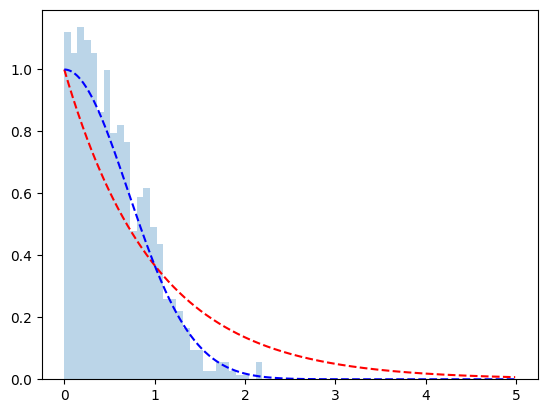

In [18]:
def rejection_sampling(target_pdf, proposal_pdf, proposal_sampler, n_samples):
    samples = []
    max_ratio = max(target_pdf(x) / proposal_pdf(x) for x in np.arange(0, 10, 0.01)) # Adjust range as per your distribution

    while len(samples) < n_samples:
        x = proposal_sampler()  # Sample from proposal distribution
        u = np.random.uniform(0, max_ratio * proposal_pdf(x))

        if u <= target_pdf(x):
            samples.append(x)

    return samples, max_ratio
# Example usage:
def target_pdf(x):
    return np.exp(-x**2)  # Example target distribution, e.g., Gaussian
def proposal_pdf(x):
    return np.exp(-x)  # Example proposal distribution, e.g., Exponential

proposal_sampler = np.random.exponential  # Example proposal sampler

samples, max_ratio = rejection_sampling(target_pdf, proposal_pdf, proposal_sampler, n_samples=1000)

x = np.arange(0, 5, 0.01)
plt.plot(x, proposal_pdf(x), 'r--')
plt.hist(samples, bins=30, density=True, alpha=0.3)
plt.plot(x, target_pdf(x), 'b--')
plt.show()

#probabilidad de caer dentro de la curva

### Rejection Sampling

In [19]:
def muestreo_rechazo(funcion, a, b, c, d, N):
    area_uniforme = (b - a) * (d - c)
    uniformX = np.random.uniform(a, b, N)
    uniformY = np.random.uniform(c, d, N)

    muestras = []
    cantidad_abajo = 0
    for i in range(N):
        if funcion(uniformX[i]) >= uniformY[i]:
            cantidad_abajo += 1
            muestras.append(uniformX)

    porcentaje = cantidad_abajo / N
    return area_uniforme * porcentaje

</div>

### Importance Sampling

In [20]:
def importancia(f, p, q, muestrasQ, N):
    q_values = muestrasQ(N)
    muestras = f(q_values) * p(q_values) / q(q_values)

    return np.mean(muestras)

## Convolucion

13
13


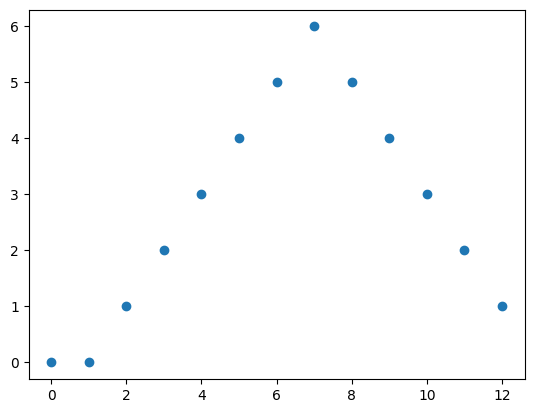

In [21]:
import numpy as np
import matplotlib.pyplot as plt


def linear_convolution(x, h):
    """
    Performs linear convolution on two input vectors.

    Args:
        x (list): First input vector.
        h (list): Second input vector.

    Returns:
        list: Convolved output vector.
    """
    n = len(x)
    m = len(h)
    y = [0] * (n + m - 1)

    for i in range(n):
        for j in range(m):
            y[i + j] += x[i] * h[j]

    return y

def get_freq_array(x):
    freq = [0] * (max(x)+1)
    for x_ in x:
        freq[x_] += 1
    return freq

def linear_convolution_from_sample(x, y):
    return linear_convolution(get_freq_array(x), get_freq_array(y))


x = (1, 2, 3, 4, 5, 6)
h = (1, 2, 3, 4, 5, 6)
# print(linear_convolution((1, 1, 1, 1, 1, 1), (1, 1, 1, 1, 1, 1)))
print(len(linear_convolution_from_sample(x, h)))

x_plot=np.arange(len(x)+len(h)+1)
print(len(x_plot))


plt.scatter(x_plot, linear_convolution_from_sample(x, h))
plt.show()
